# Notebook Imports and Packages

In [60]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression

%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
#make data
x_1 = np.linspace(start = -3, stop = 3, num = 500)
# x_1 = np.linspace(-3,3,10)//this can be written in this way too
# x_1

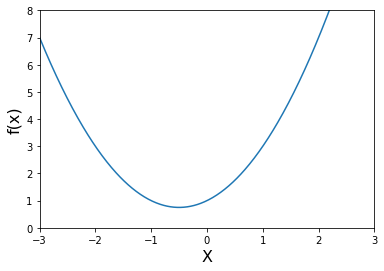

In [4]:
#plot
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)

plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivative
Challenge : Create a python function for the derivative of $f(x)$ called $df(x)$

In [5]:
def df(x):
    return 2*x + 1

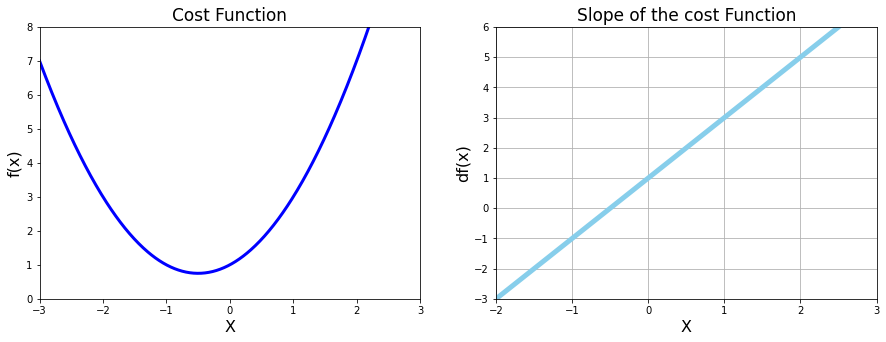

In [6]:
#plot function and derivative side by side

plt.figure(figsize = [15,5])

# 1 Chart: Cost Function
plt.subplot(1,2,1)
plt.xlim([-3,3])
plt.ylim([0,8])
plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.plot(x_1, f(x_1), color='blue', linewidth = 3)

#2 Chart: Derivative
plt.subplot(1,2,2)
plt.xlim([-2,3])
plt.ylim([-3,6])
plt.title('Slope of the cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.grid()
plt.ylabel('df(x)', fontsize = 16)
plt.plot(x_1,df(x_1),color='skyblue', linewidth = 5)

plt.show()

## Python Loops & Gradient Descent


In [7]:
# python for loop
for counter in range(5):
    print('Hello World', counter)
print('End of loop')

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4
End of loop


In [8]:
# python while loop
counter  = 0
while(counter<5):
    print('Counting...',counter)
    counter = counter + 1
print('Ready or not, here I come!')    

Counting... 0
Counting... 1
Counting... 2
Counting... 3
Counting... 4
Ready or not, here I come!


In [9]:
# Gradient Descent 
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x) 
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
#     print(step_size)


    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times:', n)
        break
    
print('local minimum occurs at: ',new_x)
print('slope or df(x) value at this point is: ', df(new_x))
print('f(x) value or cost at this point is: ',f(new_x))

Loop ran this many times: 50
local minimum occurs at:  -0.49996003706460423
slope or df(x) value at this point is:  7.992587079153068e-05
f(x) value or cost at this point is:  0.7500000015970362


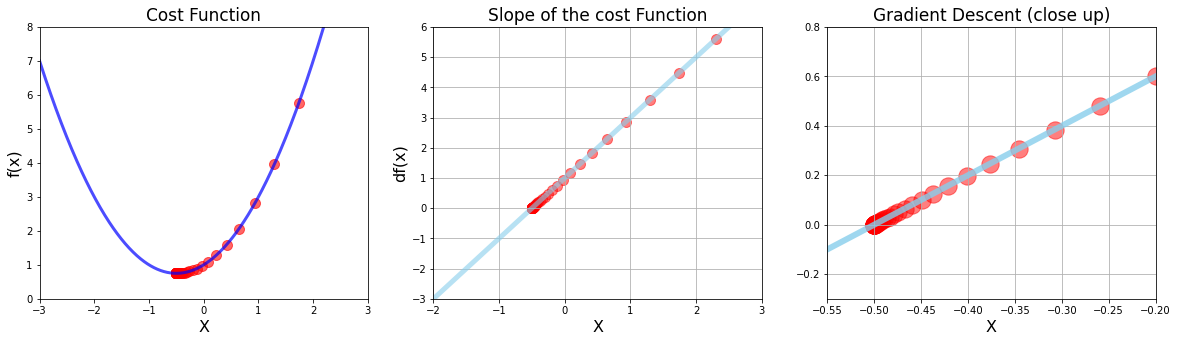

In [10]:
#superimpose the gradient descent calculations on plot

plt.figure(figsize = [20,5])

# 1 Chart: Cost Function
plt.subplot(1,3,1)
plt.xlim([-3,3])
plt.ylim([0,8])
plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.plot(x_1, f(x_1), color='blue', linewidth = 3,alpha=0.7)

values = np.array(x_list) # the reason of writing this line is , function only run with array not with lits, (f(x_list) is a list)
plt.scatter(x_list, f(values), color='red', s = 100, alpha = 0.6)

#2 Chart: Derivative
plt.subplot(1,3,2)
plt.xlim([-2,3])
plt.ylim([-3,6])
plt.title('Slope of the cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.grid()
plt.ylabel('df(x)', fontsize = 16)
plt.plot(x_1,df(x_1),color='skyblue', linewidth = 5,alpha=0.6)

plt.scatter(x_list, slope_list, color='red', s=100,alpha=0.5)


#2 Chart: Derivative (close up)
plt.subplot(1,3,3)
plt.xlim([-0.55,-0.2])
plt.ylim([-0.3,0.8])
plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.grid()
plt.plot(x_1,df(x_1),color='skyblue', linewidth = 6,alpha=0.8)

plt.scatter(x_list, slope_list, color='red', s=300,alpha=0.5)

plt.show()

# Example 2 - Multiple minima vs initial Guess & Advanced function 

## $$g(x) = x^4 - 4x^2 + 5$$

In [11]:
# make some data
x_2 = np.linspace(-2,2,1000)

# challenge: Write the g(x) function and the dg(x) function in python?
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

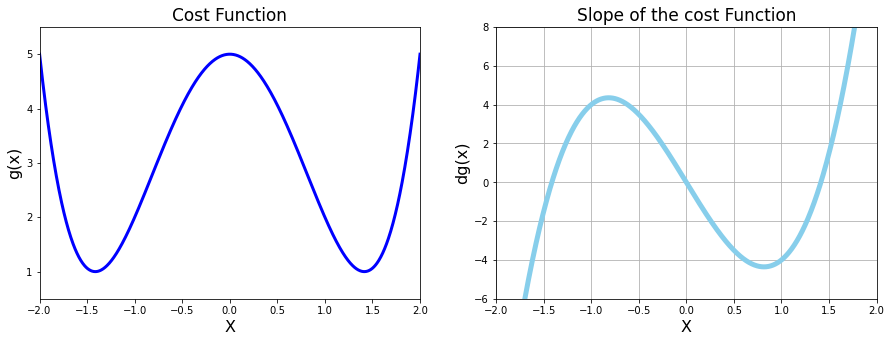

In [12]:
#plot function and derivative side by side

plt.figure(figsize = [15,5])

# 1 Chart: Cost Function
plt.subplot(1,2,1)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)
plt.plot(x_2, g(x_2), color='blue', linewidth = 3)

#2 Chart: Derivative
plt.subplot(1,2,2)
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.title('Slope of the cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.grid()
plt.ylabel('dg(x)', fontsize = 16)
plt.plot(x_2,dg(x_2),color='skyblue', linewidth = 5)

plt.show()

# Gradient Descent as a Python Function

In [13]:
# def gradient_descent(derivative_func, initial_guess, multiplier = 0.02, precision = 0.001,max_iter=300):
    
    
#     new_x = initial_guess
#     x_list = [new_x]
#     slope_list = [derivative_func(new_x)]

#     for n in range(max_iter):
#         previous_x = new_x
#         gradient = derivative_func(previous_x) 
#         new_x = previous_x - multiplier * gradient

#         step_size = abs(new_x - previous_x)
#     #     print(step_size)


#         x_list.append(new_x)
#         slope_list.append(derivative_func(new_x))

#         if step_size < precision:
#             break
    
    
#     return new_x, x_list, slope_list

In [14]:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = -0.5, multiplier = 0.01, precision = 0.0001)
print('Local Min occurs at : ', local_min)
print('Number of steps: ', len(list_x))

NameError: name 'gradient_descent' is not defined

In [ ]:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = -0.1)
print('Local Min occurs at : ', local_min)
print('Number of steps: ', len(list_x))

In [ ]:
# calling gradient Descent 
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 0.1)
#plot function and derivative and scatter plot  side by side

plt.figure(figsize = [15,5])

# 1 Chart: Cost Function
plt.subplot(1,2,1)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)
plt.plot(x_2, g(x_2), color='blue', linewidth = 3,alpha = 0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)
            


#2 Chart: Derivative
plt.subplot(1,2,2)
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.title('Slope of the cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.grid()
plt.ylabel('dg(x)', fontsize = 16)
plt.plot(x_2,dg(x_2),color='skyblue', linewidth = 5,alpha = 0.6)
plt.scatter(list_x,deriv_list,color='red', s=100, alpha = 0.5)

plt.show()

# Example 3 - Divergence, Overflow and Python Tuples

## $$h(x) = x^5 - 2x^4 + 2$$

In [ ]:
#make data
x_3 = np.linspace(start = -2.5, stop = 2.5, num = 1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

In [ ]:
# calling gradient Descent 
local_min, list_x, deriv_list = gradient_descent(derivative_func = dh, initial_guess = -0.2,max_iter = 70)
#plot function and derivative and scatter plot  side by side

plt.figure(figsize = [15,5])

# 1 Chart: Cost Function
plt.subplot(1,2,1)

plt.xlim([-1.2,2.5])
plt.ylim([-1,4])
plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('h(x)', fontsize = 16)
plt.plot(x_3, h(x_3), color='blue', linewidth = 3,alpha = 0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)
            


#2 Chart: Derivative
plt.subplot(1,2,2)
plt.xlim([-1,2])
plt.ylim([-4,5])
plt.title('Slope of the cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.grid()
plt.ylabel('dh(x)', fontsize = 16)
plt.plot(x_3,dh(x_3),color='skyblue', linewidth = 5,alpha = 0.6)
plt.scatter(list_x,deriv_list,color='red', s=100, alpha = 0.5)

plt.show()

print('Local min occurs at: ',local_min)
print('Cost at which minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

In [ ]:
import sys
# help(sys)
# sys.version
# type(h(local_min))
sys.float_info.max

## Python Tuples


In [ ]:
# Creating a Tuples - tuples packing
breakfest = 'bacon', 'eggs', 'avacado'
unlucky_numbers = 13, 4, 9, 36, 17

#How to access a value in a tuple
print('I Looove ', breakfest[0])
print('My hotel has no '+ str(unlucky_numbers[1]) + 'th floor')

not_my_address = 1, 'Infinite loop', 'Cupertino', 95014      # tuples contains heteroGeneous data, arraylist of java
# breakfest[0] = 'Sausage',   tuples are immutable

tuple_with_single_value = 42,
type(tuple_with_single_value)

main, side, greens = breakfest
print('main course is ', main)

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is', data_tuple[0])
print('Cost at the last x value is ',h(data_tuple[0]))
print('Number of Steps is', len(data_tuple[1]))

# The Learning Rate


In [ ]:
# calling gradient Descent 
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess =1.9, multiplier = 0.02, max_iter=500)
#plot function and derivative and scatter plot  side by side

plt.figure(figsize = [15,5])

# 1 Chart: Cost Function
plt.subplot(1,2,1)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)
plt.plot(x_2, g(x_2), color='blue', linewidth = 3,alpha = 0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)
            


#2 Chart: Derivative
plt.subplot(1,2,2)
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.title('Slope of the cost Function', fontsize=17)
plt.xlabel('X', fontsize = 16)
plt.grid()
plt.ylabel('dg(x)', fontsize = 16)
plt.plot(x_2,dg(x_2),color='skyblue', linewidth = 5,alpha = 0.6)
plt.scatter(list_x,deriv_list,color='red', s=100, alpha = 0.5)

plt.show()

print('Number of steps: ', len(list_x))

In [ ]:
# Run Gradient Descent 3 times 
n = 100
low_gamma = gradient_descent(derivative_func = dg, initial_guess =3, multiplier = 0.0005,precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func = dg, initial_guess =3, multiplier = 0.001,precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func = dg, initial_guess =3, multiplier = 0.002,precision=0.0001, max_iter=n)

#Expriment
insane_gamma = gradient_descent(derivative_func = dg, initial_guess =1.9, multiplier = 0.25,precision=0.0001, max_iter=n)

#plotting reduction in cost for each iteration
plt.figure(figsize = [20,10])

plt.xlim([0,n])
plt.ylim([0,50])
plt.title('Effect of the Learning Rate', fontsize=17)
plt.xlabel('Number of iterations', fontsize = 16)
plt.ylabel('Cost', fontsize = 16)

#Values for our chart
#1) Y axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])

# 2) X axis Data : create a list from 0 to n+1
iteration_list = list(range(0,n+1))


# plotting  low learning rate 
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth = 5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

#plotting mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth = 5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', s=80)

#plotting high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='hotpink', linewidth = 5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='hotpink', s=80)

#plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='red', linewidth = 5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red', s=80)

# the higher the multiplier , higher the convergence, this is why HOTPINK has higher convergence then steelblue and lightgreen 

plt.show() 
            

 # Example 4 - Data Visualisation with 3D charts
 
## Minimise $$f(x, y) = \frac{1}{3^{-x^2 -y^2} + 1}$$

minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 -y^2}$

In [16]:
def f(x, y):
    r = 3**(-x**2 -y**2)
    return 1/(r + 1)

In [17]:
# Make  our x and y data
x_4 = np.linspace(-2,2,200)
y_4 = np.linspace(-2,2,200)

print('Shape of x array',x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4) 
print('Array after mehsgrid',x_4.shape)

Shape of x array (200,)
Array after mehsgrid (200, 200)


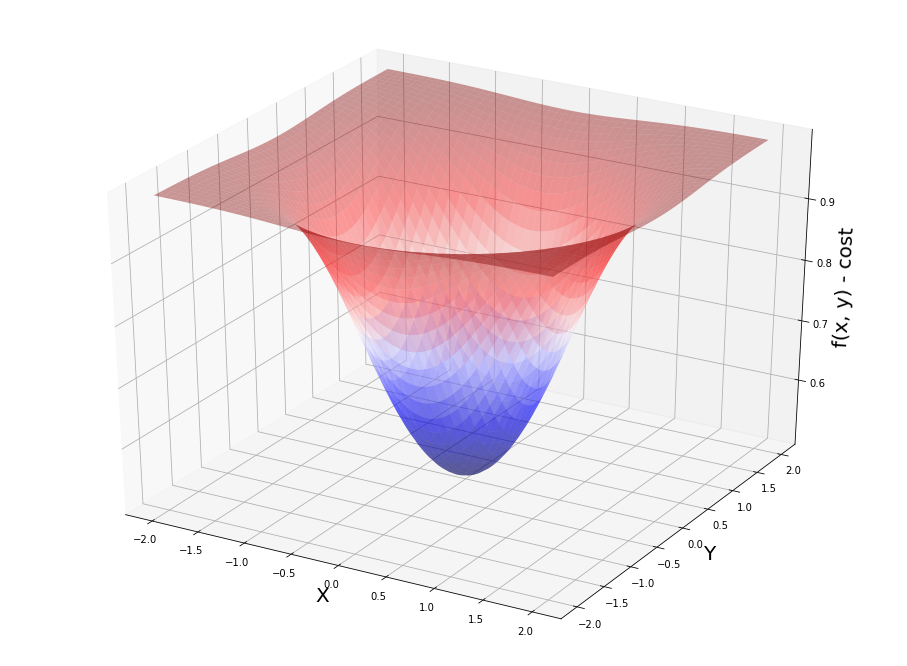

In [18]:
# Generating 3D plot
fig  = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d') #get current axes  = GCA

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.seismic, alpha = 0.4) # mehsgrid return 1d array to 2d array


plt.show()

## high cost in red,  low cost in Dark blue

## Partial Derivatives & Symbolic Computation
 
## $$\frac{\partial f}{\partial x} = \frac{2x \frac ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right)^2}$$

## $$\frac{\partial f}{\partial y} = \frac{2y \frac ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right)^2}$$

In [22]:
a, b = symbols('x, y')
print('Our cost function f(x,y) is:', f(a,b)) 
print('Partial Derivative with respect to x is ',diff(f(a,b), a))
print('Value of f(x,y) at x=1.8 y=1.0 is: ',f(a, b).evalf(subs={a:1.8, b:1.0}))
print('Value of partial derivative wrt x: ', diff(f(a,b),a).evalf(subs={a:1.8,b:1.0}))

Our cost function f(x,y) is: 1/(3**(-x**2 - y**2) + 1)
Partial Derivative with respect to x is  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is:  0.990604794032582
Value of partial derivative wrt x:  0.0368089716197505


## Batch Gradient Descent with Sympy

In [23]:
 #setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess


for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
#Result
print('Values in gradient Array', gradients)
print('Minimum occurs at x value of:', params[0]);
print('Minimum occurs at y value of', params[1]);
print('The cost is:', f(params[0],params[1]))

Values in gradient Array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of: 3.45838599885832e-11
Minimum occurs at y value of 1.92132555492129e-11
The cost is: 0.500000000000000


In [24]:
# Pratial Derivative function Example 4

def fpx(x, y):
    r = 3**(-x**2 -y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 -y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [25]:
 #setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess


for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
#Result
print('Values in gradient Array', gradients)
print('Minimum occurs at x value of:', params[0]);
print('Minimum occurs at y value of', params[1]);
print('The cost is:', f(params[0],params[1]))

Values in gradient Array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of 1.9213255549212797e-11
The cost is: 0.5


## Graphing 3D Gradient Descent & Advance Numpy Arrays

In [55]:
 #setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1,2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
#     values_array = np.append(values_array, params.reshape(1,2),axis=0)
    # axis = 0, means append at the 0th row
    values_array = np.concatenate((values_array,params.reshape(1,2)), axis = 0)
    
#Result
print('Values in gradient Array', gradients)
print('Minimum occurs at x value of:', params[0]);
print('Minimum occurs at y value of', params[1]);
print('The cost is:', f(params[0],params[1]))

(1, 2)
Values in gradient Array [0.00046144 0.00025636]
Minimum occurs at x value of: 0.0007938985101347202
Minimum occurs at y value of 0.0004410547278526219
The cost is: 0.5000002265349848


In [56]:
#Advance numpy Array Practise: 

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thoughts','MC'],['QuestLove','Drums']])
print(hs_band.shape)

print('hs_band[0]: ', hs_band[0])
print('hs_band[0][1]: ', hs_band[1][0])

the_roots = np.append(arr = hs_band, values = kirk , axis = 0)
print(the_roots)

print('Printing nickname... ', the_roots[:, 0])

the_roots = np.append(arr = the_roots, values=[['Malik B','MC']], axis=0)
print('Printing band Roles...', the_roots[:,1])

(1, 2)
(2, 2)
hs_band[0]:  ['Black Thoughts' 'MC']
hs_band[0][1]:  QuestLove
[['Black Thoughts' 'MC']
 ['QuestLove' 'Drums']
 ['Captain' 'Guitar']]
Printing nickname...  ['Black Thoughts' 'QuestLove' 'Captain']
Printing band Roles... ['MC' 'Drums' 'Guitar' 'MC']


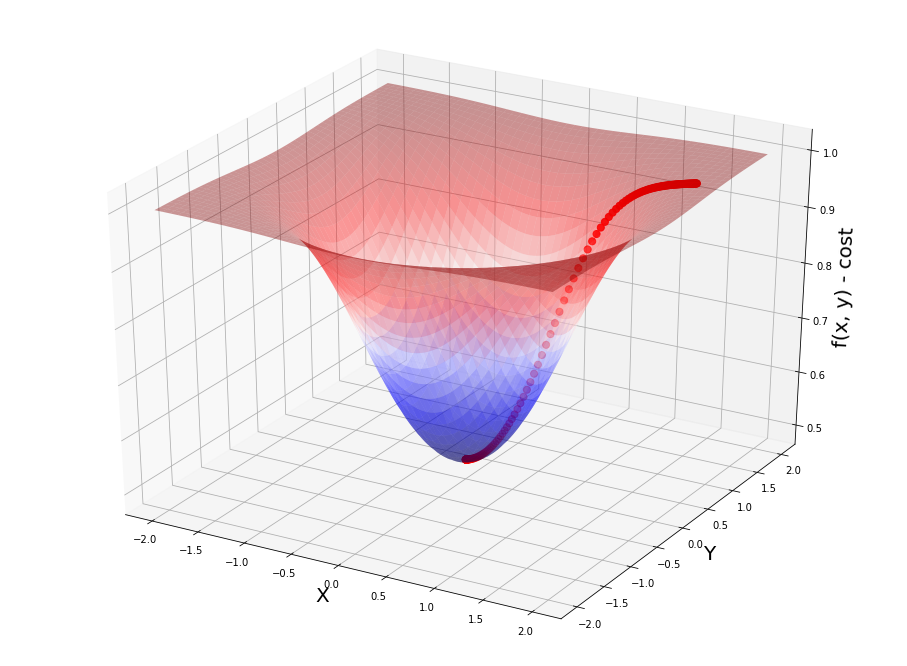

In [57]:
# Generating 3D plot
fig  = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d') #get current axes  = GCA

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.seismic, alpha = 0.4) # mehsgrid return 1d array to 2d array
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 0]), s = 50, color = 'red')
#[:,0] means select all rows and 0th column

plt.show()

# Example 5 - Working with data & a real cost Function

## Mean Squared Error : A cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big (y^{(i)} - h_\theta x^{(i)} \big)^2 $$  
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big (y^{(i)} - h_\theta x^{(i)} \big)^2 $$  
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big (y - \hat{y} \big)^2 $$  

In [68]:
# make example data 
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose() #transpose convert 1d to 2d array
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.0, 9.4, 8.2]).reshape(7,1)

print('Shape of x_5 is: ',x_5.shape)
print('Shape of y_5 is: ',y_5.shape)

Shape of x_5 is:  (7, 1)
Shape of y_5 is:  (7, 1)


In [71]:
#quick linear regression

regr = LinearRegression()
regr.fit(x_5, y_5)

print('Theta 0:', regr.intercept_[0])
print('Theta 1', regr.coef_[0][0])

Theta 0: 0.8413596725395989
Theta 1 1.220279409147535


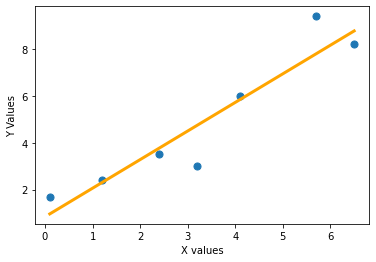

In [75]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('X values')
plt.ylabel('Y Values')
plt.show()